In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
%matplotlib inline

df = pd.read_csv('winemag-data-130k-v2.csv', index_col=[0])

In [2]:
df.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [3]:
df.shape

(129971, 13)

In [4]:
df.isnull().sum()/df.shape[0]

country                  0.000485
description              0.000000
designation              0.288257
points                   0.000000
price                    0.069215
province                 0.000485
region_1                 0.163475
region_2                 0.611367
taster_name              0.201922
taster_twitter_handle    0.240154
title                    0.000000
variety                  0.000008
winery                   0.000000
dtype: float64

In [5]:
df[(df['taster_name'].isnull()) & (df['taster_twitter_handle'].notnull())]

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery


In [6]:
df.drop(['taster_twitter_handle'], axis=1, inplace=True)

Since the numbers of wineries to be attributed a country is quite short, I decided to do some internet searches and fill in the country NaN with the countries fo these wineries.

In [7]:
producers_to_locate = df[df.country.isnull()].winery.unique()
producers_to_locate

array(['Gotsa Family Wines', 'Barton & Guestier',
       'Kakhetia Traditional Winemaking', 'Tsililis', 'Ross-idi',
       'Orbelus', 'St. Donat', 'Familia Deicas', 'Bartho Eksteen',
       'Stone Castle', 'Teliani Valley', 'Undurraga', 'Mt. Beautiful',
       'Neumeister', 'Bachelder', 'Chilcas', 'Santa Ema', 'Psagot',
       'Newton Johnson', 'Ktima Voyatzi', 'Lismore', 'Logodaj',
       'Somlói Vándor', 'Les Frères Dutruy', 'El Capricho',
       'Amiran Vepkhvadze', 'Büyülübağ'], dtype=object)

In [8]:
Country = ['Georgia', 
           'France',
           'Georgia',
           'Greece', 
           'Bulgaria',
           'Bulgaria', 
           'Hungary', 
           'Uruguay', 
           'South Africa',
           'Kosovo', 
           'Georgia',
           'Chile', 
           'New Zealand',
           'Austria', 
           'US', 
           'Chile',
           'Chile',
           'Israel',
           'South Africa',
           'Greece', 
           'South Africa',
           'South Africa',
           'Hungary',
           'Switzerland', 
           'Uruguay',
           'Georgia', 
           'Turkey']
           
producers_to_locate_dict = dict(zip(list(producers_to_locate), Country))

In [9]:
for producer in producers_to_locate:
    df.loc[df['winery'] == producer, 'country'] = [producers_to_locate_dict[producer]] * len(df.loc[df['winery'] == producer, 'country'])
    

In [10]:
df.isnull().sum()/df.shape[0]

country        0.000000
description    0.000000
designation    0.288257
points         0.000000
price          0.069215
province       0.000485
region_1       0.163475
region_2       0.611367
taster_name    0.201922
title          0.000000
variety        0.000008
winery         0.000000
dtype: float64

In [11]:
df[df.variety.isnull()]

,country,description,designation,points,price,province,region_1,region_2,taster_name,title,variety,winery
86909,Chile,"A chalky, dusty mouthfeel nicely balances this...",NaN,88,17.0,Maipo Valley,NaN,NaN,NaN,Carmen 1999 (Maipo Valley),NaN,Carmen


In [12]:
df.loc[df.variety.isnull(), 'variety'] = 'Cabernet Blend'

In [13]:
df.isnull().sum()/df.shape[0]

country        0.000000
description    0.000000
designation    0.288257
points         0.000000
price          0.069215
province       0.000485
region_1       0.163475
region_2       0.611367
taster_name    0.201922
title          0.000000
variety        0.000000
winery         0.000000
dtype: float64

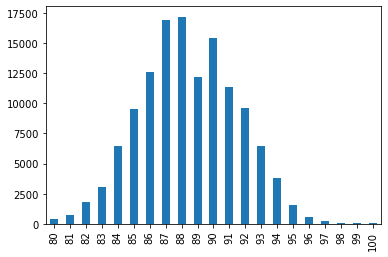

In [14]:
(df.points.value_counts().sort_index()).plot(kind="bar");

In [15]:
df.price.describe()

count    120975.000000
mean         35.363389
std          41.022218
min           4.000000
25%          17.000000
50%          25.000000
75%          42.000000
max        3300.000000
Name: price, dtype: float64

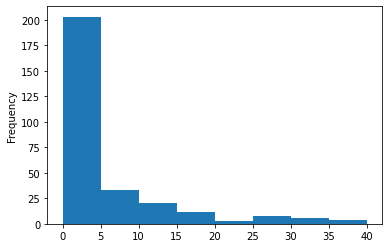

In [16]:
(df.price.value_counts()).plot(kind="hist", bins=[0, 5, 10, 15, 20, 25, 30, 35, 40]);

<AxesSubplot:ylabel='country'>

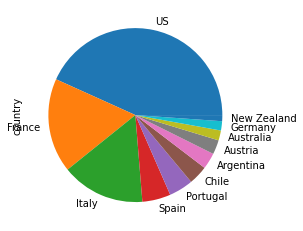

In [17]:
country_val = df.country.value_counts()
(country_val[:11]).plot(kind='pie')

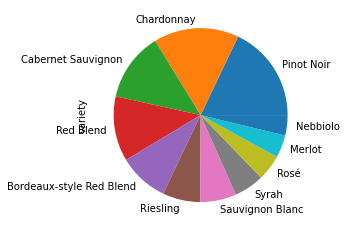

In [92]:
variety_val = df.variety.value_counts()
(variety_val[:11]).plot(kind='pie');

In [18]:
def find_vintage(wine):
    years = np.arange(1900, 2022).astype(str)
    for word in wine.split():
        if word in years:
            return int(word)

In [19]:
df['vintage'] = df.title.apply(find_vintage)

In [20]:
df.vintage.describe()

count    125345.000000
mean       2010.671291
std           3.797903
min        1904.000000
25%        2009.000000
50%        2011.000000
75%        2013.000000
max        2017.000000
Name: vintage, dtype: float64

In [21]:
df.isnull().sum()/df.shape[0]

country        0.000000
description    0.000000
designation    0.288257
points         0.000000
price          0.069215
province       0.000485
region_1       0.163475
region_2       0.611367
taster_name    0.201922
title          0.000000
variety        0.000000
winery         0.000000
vintage        0.035593
dtype: float64

Questions:
1. Which wine producing countries offer best value for money?
2. Which quantitative variable correlates best with price of a wine?
3. How well can we predict the average score of a wine from this dataset?

**Which wine producing countries offer best value for money?**

In [22]:
df['quality_for_money'] = df['points']/df['price']

In [23]:
quality_for_money_per_country = df.groupby('country').quality_for_money.agg(['mean', 'count']).reset_index().sort_values(by='mean', ascending=False)

In [24]:
quality_for_money_per_country

,country,mean,count
23,Kosovo,10.627622,4
42,Ukraine,9.671551,14
33,Romania,8.873497,120
20,India,7.129465,9
4,Bosnia and Herzegovina,6.935897,2
6,Bulgaria,6.809304,151
28,Moldova,6.554833,59
1,Armenia,6.040476,2
8,Chile,5.772730,4419
31,Peru,5.629018,16


In [25]:
wines_tastings_per_country = df.groupby('country').title.agg('count').reset_index()

In [26]:
top_10_producing_countries = wines_tastings_per_country.sort_values(by='title', ascending=False)[:11]['country'].tolist()

In [27]:
top_10_producing_countries

['US',
 'France',
 'Italy',
 'Spain',
 'Portugal',
 'Chile',
 'Argentina',
 'Austria',
 'Australia',
 'Germany',
 'New Zealand']

In [28]:
quality_for_money_per_country[quality_for_money_per_country['country'].isin(top_10_producing_countries)]

,country,mean,count
8,Chile,5.772730,4419
32,Portugal,5.519209,4875
0,Argentina,5.171533,3756
38,Spain,4.941238,6573
2,Australia,4.243219,2294
30,New Zealand,4.151508,1380
15,France,3.837816,17776
3,Austria,3.812679,2808
17,Germany,3.707988,2120
22,Italy,3.475651,16914


**Which wine varieties are critic favourites?**

In [71]:
average_score_per_variety = df.groupby('variety').points.agg(['mean', 'count']).sort_values(by='mean', ascending=False).reset_index()

In [72]:
average_score_per_variety[:21]

,variety,mean,count
0,Terrantez,95.000000,1
1,Tinta del Pais,95.000000,2
2,Gelber Traminer,95.000000,1
3,Bual,94.142857,7
4,Sercial,94.000000,1
5,Riesling-Chardonnay,94.000000,1
6,Ramisco,93.000000,1
7,Garnacha-Cariñena,93.000000,1
8,Blauburgunder,93.000000,1
9,Muscadelle,92.500000,10


In [73]:
average_score_per_variety = average_score_per_variety.sort_values(by='count', ascending=False)

In [74]:
average_score_per_variety['count_cumulative_perc'] = average_score_per_variety['count'].cumsum()/average_score_per_variety['count'].sum()

In [75]:
average_score_per_variety_top_20_volume = average_score_per_variety[:21]

In [77]:
average_score_per_variety_top_20_volume[['variety','mean']].sort_values(by='mean', ascending=False).reset_index(drop=True)

,variety,mean
0,Nebbiolo,90.251070
1,Champagne Blend,89.663324
2,Riesling,89.450183
3,Pinot Noir,89.411468
4,Syrah,89.286577
5,Rhône-style Red Blend,89.153637
6,Bordeaux-style Red Blend,89.106435
7,Portuguese Red,88.810624
8,Cabernet Sauvignon,88.607580
9,Sangiovese,88.550794


**Are their some common traits to the most expensive wines in the dataset?**

In [78]:
ninetynineth_percentile_price = df.price.quantile(0.99)

In [79]:
df_most_expensive_wines = df[df['price']>ninetynineth_percentile_price]

In [80]:
df_most_expensive_wines.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,title,variety,winery,vintage,quality_for_money
284,Argentina,This huge Malbec defines jammy and concentrate...,Marchiori Vineyard Block C2,92,215.0,Mendoza Province,Perdriel,NaN,Michael Schachner,Viña Cobos 2011 Marchiori Vineyard Block C2 Ma...,Malbec,Viña Cobos,2011.0,0.427907
345,Australia,This wine contains some material over 100 year...,Rare,100,350.0,Victoria,Rutherglen,NaN,Joe Czerwinski,Chambers Rosewood Vineyards NV Rare Muscat (Ru...,Muscat,Chambers Rosewood Vineyards,NaN,0.285714
346,Australia,"This deep brown wine smells like a damp, mossy...",Rare,98,350.0,Victoria,Rutherglen,NaN,Joe Czerwinski,Chambers Rosewood Vineyards NV Rare Muscadelle...,Muscadelle,Chambers Rosewood Vineyards,NaN,0.280000
347,Germany,"Dusty, saffron-spiced earthiness is juxtaposed...",Kiedrich Gräfenberg Trockenbeerenauslese,97,775.0,Rheingau,NaN,NaN,Anna Lee C. Iijima,Robert Weil 2014 Kiedrich Gräfenberg Trockenbe...,Riesling,Robert Weil,2014.0,0.125161
349,Australia,"RunRig is always complex, and the 2012 doesn't...",RunRig,97,225.0,South Australia,Barossa,NaN,Joe Czerwinski,Torbreck 2012 RunRig Shiraz-Viognier (Barossa),Shiraz-Viognier,Torbreck,2012.0,0.431111


In [81]:
df_most_expensive_wines.shape

(1183, 14)

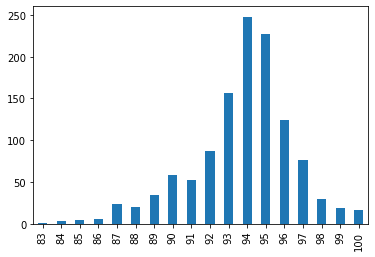

In [82]:
(df_most_expensive_wines.points.value_counts().sort_index()).plot(kind="bar");

In [83]:
df_most_expensive_wines.vintage.describe()

count    1163.000000
mean     2008.296647
std         8.191483
min      1934.000000
25%      2007.000000
50%      2010.000000
75%      2012.000000
max      2015.000000
Name: vintage, dtype: float64

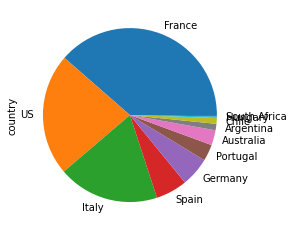

In [90]:
country_most_expensive_val = df_most_expensive_wines.country.value_counts()
(country_most_expensive_val[:11]).plot(kind='pie');

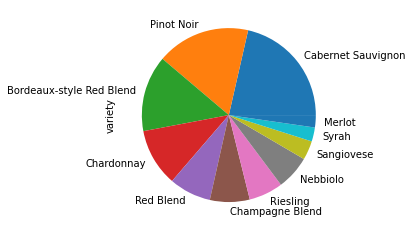

In [93]:
variety_most_expensive_val = df_most_expensive_wines.variety.value_counts()
(variety_most_expensive_val[:11]).plot(kind='pie');

**How well can we predict the average score of a wine from this dataset with a linear regression model?**

To answer this question we first need to aggregate the average score of every wine in the list.

In [94]:
df_new = df.groupby(['title', 'vintage']).agg({'country': 'first',
                                               'points': 'mean',
                                               'price':'first',
                                               'region_1': 'first',
                                               'region_2': 'first',
                                               'winery': 'first',
                                               'variety': 'first'}).reset_index(col_level=1)

In [95]:
df_new

,title,vintage,country,points,price,region_1,region_2,winery,variety
0,1+1=3 2008 Rosé Cabernet Sauvignon (Penedès),2008.0,Spain,82.0,18.0,Penedès,None,1+1=3,Cabernet Sauvignon
1,10 Knots 2006 Beachcomber White (Paso Robles),2006.0,US,83.0,21.0,Paso Robles,Central Coast,10 Knots,Rhône-style White Blend
2,10 Knots 2006 Chardonnay (Santa Barbara County),2006.0,US,85.0,21.0,Santa Barbara County,Central Coast,10 Knots,Chardonnay
3,10 Knots 2009 Moonraker Grenache (Paso Robles),2009.0,US,81.0,35.0,Paso Robles,Central Coast,10 Knots,Grenache
4,10 Knots 2010 Viognier (Paso Robles),2010.0,US,84.0,22.0,Paso Robles,Central Coast,10 Knots,Viognier
...,...,...,...,...,...,...,...,...,...
115224,àMaurice 2014 Boushey Vineyard Syrah (Yakima V...,2014.0,US,89.0,45.0,Yakima Valley,Columbia Valley,àMaurice,Syrah
115225,àMaurice 2014 Fred Estate Syrah (Walla Walla V...,2014.0,US,88.0,45.0,Walla Walla Valley (WA),Columbia Valley,àMaurice,Syrah
115226,Štoka 2009 Izbrani Teran (Kras),2009.0,Slovenia,88.0,20.0,None,None,Štoka,Teran
115227,Štoka 2011 Grganja Vitovska (Kras),2011.0,Slovenia,90.0,23.0,None,None,Štoka,Vitovska


In [96]:
df_new.isnull().sum()/df_new.shape[0]

title       0.000000
vintage     0.000000
country     0.000000
points      0.000000
price       0.067934
region_1    0.164906
region_2    0.601047
winery      0.000000
variety     0.000000
dtype: float64

In [97]:
df_new = df_new.dropna(subset=['price'])

In [98]:
df_new.isnull().sum()/df_new.shape[0]

title       0.000000
vintage     0.000000
country     0.000000
points      0.000000
price       0.000000
region_1    0.163509
region_2    0.573794
winery      0.000000
variety     0.000000
dtype: float64

In [99]:
df_new.drop(columns=['region_2', 'title', 'winery'], inplace=True)

C:\Users\julie\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [100]:
df_new.isnull().sum()/df_new.shape[0]

vintage     0.000000
country     0.000000
points      0.000000
price       0.000000
region_1    0.163509
variety     0.000000
dtype: float64

In [101]:
def create_dummy_df(df, cat_cols, dummy_na):
    '''
    INPUT:
    df - pandas dataframe with categorical variables you want to dummy
    cat_cols - list of strings that are associated with names of the categorical columns
    dummy_na - Bool holding whether you want to dummy NA vals of categorical columns or not
    
    OUTPUT:
    df - a new dataframe that has the following characteristics:
            1. contains all columns that were not specified as categorical
            2. removes all the original columns in cat_cols
            3. dummy columns for each of the categorical columns in cat_cols
            4. if dummy_na is True - it also contains dummy columns for the NaN values
            5. Use a prefix of the column name with an underscore (_) for separating 
    '''
    for col in cat_cols:
        df = pd.concat([df.drop(col, axis=1), pd.get_dummies(df[col], prefix=col, prefix_sep='_', drop_first=True, dummy_na=dummy_na)], axis=1)
    return df

In [102]:
cat_df = df_new.select_dtypes(include=['object']) 
df_new = create_dummy_df(df_new, cat_df, dummy_na=True)

In [103]:
X = df_new.loc[:, df_new.columns != 'points']
y = df_new['points']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=10)

lm_model = LinearRegression(normalize=True)

lm_model.fit(X_train, y_train)

LinearRegression(normalize=True)

In [104]:
y_test_preds = lm_model.predict(X_test)

In [105]:
r2_score(y_test, y_test_preds)

-1.746617603025279e+26

In [106]:
y_train_preds = lm_model.predict(X_train)
r2_score(y_train, y_train_preds)

0.3831847758970701